<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 8 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Produisez une étude de marché avec R ou Python
</h2>
</div>

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation des packages nécessaires 
import pandas as pd 
import numpy as np 
#Les packages de visualization
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
#Importer les packages de préparation de données 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
#Importer les packages de clustering 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
#importer les packages de CAH "La classification ascendante hiérarchique"
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy import stats
import plotly.graph_objects as go

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [2]:
# Importation des fichier
chemin = 'D:\\CODE\\Projet Openclassrooms\\Projet n_8\\excel\\'
population = pd.read_csv(chemin + 'Population.csv')
Produit_Intérieur_Brut = pd.read_csv(chemin + 'Produit Intérieur Brut.csv')
Volailles = pd.read_csv(chemin + 'Volailles.csv')
alimentaire = pd.read_csv(chemin + 'alimentaire.csv')

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse des données </h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - population</h3>
</div>

In [3]:
population

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,4,Afghanistan,511,Population totale,3010,Population-Estimations,2010,2010,1000 personnes,28189.672,X,Ciffre de sources internationales,NaN
1,OA,Séries temporelles annuelles,4,Afghanistan,511,Population totale,3010,Population-Estimations,2011,2011,1000 personnes,29249.157,X,Ciffre de sources internationales,NaN
2,OA,Séries temporelles annuelles,4,Afghanistan,511,Population totale,3010,Population-Estimations,2012,2012,1000 personnes,30466.479,X,Ciffre de sources internationales,NaN
3,OA,Séries temporelles annuelles,4,Afghanistan,511,Population totale,3010,Population-Estimations,2013,2013,1000 personnes,31541.209,X,Ciffre de sources internationales,NaN
4,OA,Séries temporelles annuelles,4,Afghanistan,511,Population totale,3010,Population-Estimations,2014,2014,1000 personnes,32716.210,X,Ciffre de sources internationales,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2104,OA,Séries temporelles annuelles,716,Zimbabwe,511,Population totale,3010,Population-Estimations,2014,2014,1000 personnes,13855.753,X,Ciffre de sources internationales,NaN
2105,OA,Séries temporelles annuelles,716,Zimbabwe,511,Population totale,3010,Population-Estimations,2015,2015,1000 personnes,14154.937,X,Ciffre de sources internationales,NaN
2106,OA,Séries temporelles annuelles,716,Zimbabwe,511,Population totale,3010,Population-Estimations,2016,2016,1000 personnes,14452.704,X,Ciffre de sources internationales,NaN
2107,OA,Séries temporelles annuelles,716,Zimbabwe,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,14751.101,X,Ciffre de sources internationales,NaN


In [4]:
population['Valeur'] = population['Valeur'] * 1000
population = population.rename(columns={'Valeur': 'Population'})

In [5]:
population_a_supprimer = ['Code Domaine', 'Domaine','Code zone (M49)', 'Code Élément', 'Élément', 'Code Produit', 'Produit', 'Code année','Unité', 'Symbole', 'Description du Symbole','Note' ]
population = population.drop(population_a_supprimer, axis=1)

In [6]:
# Convertir la colonne 'Année' en type numérique (si elle ne l'est pas déjà)
population['Année'] = population['Année'].apply(pd.to_numeric, errors='coerce')

# Arrondir les valeurs de la colonne 'Population' à des chiffres ronds
population['Population'] = population['Population'].round()

# Afficher le DataFrame résultant
print(population)

             Zone  Année  Population
0     Afghanistan   2010  28189672.0
1     Afghanistan   2011  29249157.0
2     Afghanistan   2012  30466479.0
3     Afghanistan   2013  31541209.0
4     Afghanistan   2014  32716210.0
...           ...    ...         ...
2104     Zimbabwe   2014  13855753.0
2105     Zimbabwe   2015  14154937.0
2106     Zimbabwe   2016  14452704.0
2107     Zimbabwe   2017  14751101.0
2108     Zimbabwe   2018  15052184.0

[2109 rows x 3 columns]


In [7]:
#fonction pour voir si il y a des NAN sur mon Data frame 
def check_for_nan(df):

    nan_check = df.isna().any()
    
    if nan_check.any():
        print("Le DataFrame contient des valeurs NaN.")
    else:
        print("Le DataFrame ne contient pas de valeurs NaN.")

check_for_nan(population)

Le DataFrame ne contient pas de valeurs NaN.


In [8]:
#création de la clé primaire du DF population 
population['Clé_primaire'] = population.apply(lambda row: f"{row['Zone']}_{row['Année']}", axis=1)

In [9]:
#Fonction pour vérifier si la clé primaire et bien primaire 
def cle_primaire(df_fusion_cle): 
  table_length = len(df_fusion_cle) - len(df_fusion_cle.drop_duplicates())
  if table_length == 0:
    print('Clé primaire (0 doublon)')
  else:
    print('Pas une clé primaire (', table_length, 'doublons )')
    
cle_primaire(population['Clé_primaire'])

Clé primaire (0 doublon)


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Produit_Intérieur_Brut</h3>
</div>

In [10]:
Produit_Intérieur_Brut

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2010,2010,US$,50944.751421,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,528,Pays-Bas (Royaume des),61290,Croissance annuelle US$ par habitant,22008,Produit Intérieur Brut,2010,2010,%,-2.948296,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2011,2011,US$,54132.113672,X,Ciffre de sources internationales,NaN
3,MK,Indicateurs macro,528,Pays-Bas (Royaume des),61290,Croissance annuelle US$ par habitant,22008,Produit Intérieur Brut,2011,2011,%,6.256508,X,Ciffre de sources internationales,NaN
4,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2012,2012,US$,49982.505942,X,Ciffre de sources internationales,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3799,MK,Indicateurs macro,716,Zimbabwe,61290,Croissance annuelle US$ par habitant,22008,Produit Intérieur Brut,2016,2016,%,0.812478,X,Ciffre de sources internationales,NaN
3800,MK,Indicateurs macro,716,Zimbabwe,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,1494.170144,X,Ciffre de sources internationales,NaN
3801,MK,Indicateurs macro,716,Zimbabwe,61290,Croissance annuelle US$ par habitant,22008,Produit Intérieur Brut,2017,2017,%,5.090939,X,Ciffre de sources internationales,NaN
3802,MK,Indicateurs macro,716,Zimbabwe,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2018,2018,US$,1570.886029,X,Ciffre de sources internationales,NaN


In [11]:
# Séparer le DataFrame en deux DataFrames distincts en fonction de la colonne "Unité"
df_Intérieur_USD = Produit_Intérieur_Brut[Produit_Intérieur_Brut['Unité'] == 'US$']
df_Intérieur_Pourcentage = Produit_Intérieur_Brut[Produit_Intérieur_Brut['Unité'] == '%']

In [12]:
df_Intérieur_USD = df_Intérieur_USD.rename(columns={'Valeur': 'US $ par habitant'})
df_Intérieur_Pourcentage = df_Intérieur_Pourcentage.rename(columns={'Valeur': 'Croissance annuelle US$ par habitant %'})

In [13]:
df_Intérieur_USD_a_supp = ['Code Domaine', 'Domaine','Code zone (M49)' ,'Code Élément', 'Élément', 'Code Produit','Unité','Produit', 'Code année', 'Symbole', 'Description du Symbole','Note' ]
df_Intérieur_USD = df_Intérieur_USD.drop(df_Intérieur_USD_a_supp, axis=1)
df_Intérieur_Pourcentage_a_supp = ['Code Domaine', 'Domaine','Code zone (M49)' ,'Code Élément', 'Élément', 'Code Produit','Unité', 'Code année', 'Symbole', 'Description du Symbole','Note' ]
df_Intérieur_Pourcentage = df_Intérieur_Pourcentage.drop(df_Intérieur_Pourcentage_a_supp, axis=1)

In [14]:
# Convertir la colonne 'Année' en type numérique 
df_Intérieur_USD['Année'] = df_Intérieur_USD['Année'].apply(pd.to_numeric, errors='coerce')
df_Intérieur_Pourcentage['Année'] = df_Intérieur_Pourcentage['Année'].apply(pd.to_numeric, errors='coerce')

# Arrondir les valeurs de la colonne 'Population' à des chiffres ronds
df_Intérieur_USD['US $ par habitant'] = df_Intérieur_USD['US $ par habitant'].round()
df_Intérieur_Pourcentage['Croissance annuelle US$ par habitant %'] = df_Intérieur_Pourcentage['Croissance annuelle US$ par habitant %'].round()

# Afficher le DataFrame résultant
print(df_Intérieur_USD)
print(df_Intérieur_Pourcentage)

                        Zone  Année  US $ par habitant
0     Pays-Bas (Royaume des)   2010            50945.0
2     Pays-Bas (Royaume des)   2011            54132.0
4     Pays-Bas (Royaume des)   2012            49983.0
6     Pays-Bas (Royaume des)   2013            51989.0
8     Pays-Bas (Royaume des)   2014            52553.0
...                      ...    ...                ...
3794                Zimbabwe   2014             1407.0
3796                Zimbabwe   2015             1410.0
3798                Zimbabwe   2016             1422.0
3800                Zimbabwe   2017             1494.0
3802                Zimbabwe   2018             1571.0

[1902 rows x 3 columns]
                        Zone                 Produit  Année  \
1     Pays-Bas (Royaume des)  Produit Intérieur Brut   2010   
3     Pays-Bas (Royaume des)  Produit Intérieur Brut   2011   
5     Pays-Bas (Royaume des)  Produit Intérieur Brut   2012   
7     Pays-Bas (Royaume des)  Produit Intérieur Brut   2013   


In [15]:
check_for_nan(df_Intérieur_USD)
check_for_nan(df_Intérieur_Pourcentage)

Le DataFrame ne contient pas de valeurs NaN.
Le DataFrame ne contient pas de valeurs NaN.


In [16]:
#création de la clé primaire 
df_Intérieur_USD['Clé_primaire'] = df_Intérieur_USD.apply(lambda row: f"{row['Zone']}_{row['Année']}", axis=1)
df_Intérieur_Pourcentage['Clé_primaire'] = df_Intérieur_Pourcentage.apply(lambda row: f"{row['Zone']}_{row['Année']}", axis=1)

In [17]:
cle_primaire(df_Intérieur_USD['Clé_primaire'])
cle_primaire(df_Intérieur_Pourcentage['Clé_primaire'])

Clé primaire (0 doublon)
Clé primaire (0 doublon)


In [18]:
columns_to_drop = ['Zone', 'Année']
df_Intérieur_USD.drop(columns=columns_to_drop, inplace=True)

In [19]:
#fusion des deux df pour obtenir le data frame produit Intérieur Brut
Produit_Intérieur_Brut = df_Intérieur_Pourcentage.merge(df_Intérieur_USD, on='Clé_primaire', how='inner')

In [20]:
check_for_nan(Produit_Intérieur_Brut)

Le DataFrame ne contient pas de valeurs NaN.


In [21]:
cle_primaire(Produit_Intérieur_Brut['Clé_primaire'])

Clé primaire (0 doublon)


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Volailles</h3>
</div>

In [22]:
Volailles

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (FBS),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2010-),4,Afghanistan,5511,Production,S2734,Viande de Volailles,2010,2010,Milliers de tonnes,28.00,I,Valeur imputée
1,FBS,Bilans Alimentaires (2010-),4,Afghanistan,5511,Production,S2734,Viande de Volailles,2011,2011,Milliers de tonnes,26.00,I,Valeur imputée
2,FBS,Bilans Alimentaires (2010-),4,Afghanistan,5511,Production,S2734,Viande de Volailles,2012,2012,Milliers de tonnes,25.00,I,Valeur imputée
3,FBS,Bilans Alimentaires (2010-),4,Afghanistan,5511,Production,S2734,Viande de Volailles,2013,2013,Milliers de tonnes,26.00,I,Valeur imputée
4,FBS,Bilans Alimentaires (2010-),4,Afghanistan,5511,Production,S2734,Viande de Volailles,2014,2014,Milliers de tonnes,25.00,I,Valeur imputée
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8062,FBS,Bilans Alimentaires (2010-),716,Zimbabwe,645,Disponibilité alimentaire en quantité (kg/pers...,S2734,Viande de Volailles,2014,2014,kg,4.72,E,Valeur estimée
8063,FBS,Bilans Alimentaires (2010-),716,Zimbabwe,645,Disponibilité alimentaire en quantité (kg/pers...,S2734,Viande de Volailles,2015,2015,kg,4.88,E,Valeur estimée
8064,FBS,Bilans Alimentaires (2010-),716,Zimbabwe,645,Disponibilité alimentaire en quantité (kg/pers...,S2734,Viande de Volailles,2016,2016,kg,5.17,E,Valeur estimée
8065,FBS,Bilans Alimentaires (2010-),716,Zimbabwe,645,Disponibilité alimentaire en quantité (kg/pers...,S2734,Viande de Volailles,2017,2017,kg,5.09,E,Valeur estimée


In [23]:
# Séparer le DataFrame en fonction de la colonne "Élément"
Volailles_Production = Volailles[Volailles['Élément'] == 'Production']
Volailles_Importations_Quantité = Volailles[Volailles['Élément'] == 'Importations - Quantité']
Volailles_Disponibilité_intérieure = Volailles[Volailles['Élément'] == 'Disponibilité intérieure']
Volailles_Nourriture = Volailles[Volailles['Élément'] == 'Nourriture']
Volailles_kg_personne_an = Volailles[Volailles['Élément'] == 'Disponibilité alimentaire en quantité (kg/personne/an)']

In [24]:
Volailles_Production = Volailles_Production.rename(columns={'Valeur': 'Production/T'})
Volailles_Importations_Quantité = Volailles_Importations_Quantité.rename(columns={'Valeur': 'Importations - Quantité/T'})
Volailles_Disponibilité_intérieure= Volailles_Disponibilité_intérieure.rename(columns={'Valeur': 'Disponibilité intérieure/T'})
Volailles_Nourriture = Volailles_Nourriture.rename(columns={'Valeur': 'Nourriture/T'})
Volailles_kg_personne_an = Volailles_kg_personne_an.rename(columns={'Valeur': 'Kg/personne/an'})

In [25]:
Volailles_Production_a_supp = ['Code Domaine', 'Domaine','Code zone (M49)' ,'Code Élément', 'Élément', 'Code Produit (FBS)','Unité', 'Code année','Unité', 'Symbole', 'Description du Symbole' ]
Volailles_Production = Volailles_Production.drop(Volailles_Production_a_supp, axis=1)

Volailles_Importations_Quantité_a_supp = ['Code Domaine', 'Domaine','Code zone (M49)' ,'Code Élément', 'Élément', 'Code Produit (FBS)','Produit','Unité', 'Code année', 'Symbole', 'Description du Symbole' ]
Volailles_Importations_Quantité = Volailles_Importations_Quantité.drop(Volailles_Importations_Quantité_a_supp, axis=1)

Volailles_Disponibilité_intérieure_a_supp = ['Code Domaine', 'Domaine','Code zone (M49)' ,'Code Élément', 'Élément', 'Code Produit (FBS)','Produit','Unité', 'Code année', 'Symbole', 'Description du Symbole']
Volailles_Disponibilité_intérieure = Volailles_Disponibilité_intérieure.drop(Volailles_Disponibilité_intérieure_a_supp, axis=1)

Volailles_Nourriture_a_supp = ['Code Domaine', 'Domaine','Code zone (M49)' ,'Code Élément', 'Élément', 'Code Produit (FBS)','Produit','Unité', 'Code année', 'Symbole', 'Description du Symbole']
Volailles_Nourriture = Volailles_Nourriture.drop(Volailles_Nourriture_a_supp, axis=1)

Volailles_kg_personne_an_a_supp = ['Code Domaine', 'Domaine','Code zone (M49)' ,'Code Élément', 'Élément', 'Code Produit (FBS)','Produit','Unité', 'Code année', 'Symbole', 'Description du Symbole']
Volailles_kg_personne_an = Volailles_kg_personne_an.drop(Volailles_kg_personne_an_a_supp, axis=1)

In [26]:
# Liste de tous vos DataFrames et les colonnes à arrondir
df_Volailles = [
    (Volailles_Production, 'Production/T'),
    (Volailles_Importations_Quantité, 'Importations - Quantité/T'),
    (Volailles_Disponibilité_intérieure, 'Disponibilité intérieure/T'),
    (Volailles_Nourriture, 'Nourriture/T'),
    (Volailles_kg_personne_an, 'Kg/personne/an')
]

# Boucle pour convertir la colonne 'Année' en numérique et arrondir la colonne spécifiée
for df, colonne_a_arrondir in df_Volailles:
    df['Année'] = pd.to_numeric(df['Année'], errors='coerce')
    df[colonne_a_arrondir] = df[colonne_a_arrondir].round()




In [27]:
Volailles_Production['Clé_primaire'] = Volailles_Production.apply(lambda row: f"{row['Zone']}_{row['Année']}", axis=1)
Volailles_Importations_Quantité['Clé_primaire'] = Volailles_Importations_Quantité.apply(lambda row: f"{row['Zone']}_{row['Année']}", axis=1)
Volailles_Disponibilité_intérieure['Clé_primaire'] = Volailles_Disponibilité_intérieure.apply(lambda row: f"{row['Zone']}_{row['Année']}", axis=1)
Volailles_Nourriture['Clé_primaire'] = Volailles_Nourriture.apply(lambda row: f"{row['Zone']}_{row['Année']}", axis=1)
Volailles_kg_personne_an['Clé_primaire'] = Volailles_kg_personne_an.apply(lambda row: f"{row['Zone']}_{row['Année']}", axis=1)

In [28]:
Volailles_Importations_Quantité.drop(columns=columns_to_drop, inplace=True)
Volailles_Disponibilité_intérieure.drop(columns=columns_to_drop, inplace=True)
Volailles_Nourriture.drop(columns=columns_to_drop, inplace=True)
Volailles_kg_personne_an.drop(columns=columns_to_drop, inplace=True)

In [29]:
Volailles = Volailles_Production.merge(Volailles_Importations_Quantité, on='Clé_primaire', how='inner')
Volailles = Volailles.merge(Volailles_Disponibilité_intérieure, on='Clé_primaire', how='inner')
Volailles = Volailles.merge(Volailles_Nourriture, on='Clé_primaire', how='inner')
Volailles = Volailles.merge(Volailles_kg_personne_an, on='Clé_primaire', how='inner')
print(Volailles)

             Zone              Produit  Année  Production/T      Clé_primaire  \
0     Afghanistan  Viande de Volailles   2010          28.0  Afghanistan_2010   
1     Afghanistan  Viande de Volailles   2011          26.0  Afghanistan_2011   
2     Afghanistan  Viande de Volailles   2012          25.0  Afghanistan_2012   
3     Afghanistan  Viande de Volailles   2013          26.0  Afghanistan_2013   
4     Afghanistan  Viande de Volailles   2014          25.0  Afghanistan_2014   
...           ...                  ...    ...           ...               ...   
1590     Zimbabwe  Viande de Volailles   2014          58.0     Zimbabwe_2014   
1591     Zimbabwe  Viande de Volailles   2015          61.0     Zimbabwe_2015   
1592     Zimbabwe  Viande de Volailles   2016          67.0     Zimbabwe_2016   
1593     Zimbabwe  Viande de Volailles   2017          69.0     Zimbabwe_2017   
1594     Zimbabwe  Viande de Volailles   2018          62.0     Zimbabwe_2018   

      Importations - Quanti

In [30]:
Volailles = Volailles.rename(columns={'Produit': 'Viande de Volailles'})

In [31]:
check_for_nan(Volailles)

Le DataFrame ne contient pas de valeurs NaN.


In [32]:
cle_primaire(Volailles['Clé_primaire'])

Clé primaire (0 doublon)


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - alimentaire</h3>
</div>

In [33]:
alimentaire

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (FBS),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2010-),4,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),S2734,Viande de Volailles,2010,2010,Kcal/personne/jour,8.64,E,Valeur estimée
1,FBS,Bilans Alimentaires (2010-),4,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),S2734,Viande de Volailles,2011,2011,Kcal/personne/jour,7.24,E,Valeur estimée
2,FBS,Bilans Alimentaires (2010-),4,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),S2734,Viande de Volailles,2012,2012,Kcal/personne/jour,7.73,E,Valeur estimée
3,FBS,Bilans Alimentaires (2010-),4,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),S2734,Viande de Volailles,2013,2013,Kcal/personne/jour,7.96,E,Valeur estimée
4,FBS,Bilans Alimentaires (2010-),4,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),S2734,Viande de Volailles,2014,2014,Kcal/personne/jour,7.97,E,Valeur estimée
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613,FBS,Bilans Alimentaires (2010-),716,Zimbabwe,664,Disponibilité alimentaire (Kcal/personne/jour),S2734,Viande de Volailles,2014,2014,Kcal/personne/jour,17.80,E,Valeur estimée
1614,FBS,Bilans Alimentaires (2010-),716,Zimbabwe,664,Disponibilité alimentaire (Kcal/personne/jour),S2734,Viande de Volailles,2015,2015,Kcal/personne/jour,18.43,E,Valeur estimée
1615,FBS,Bilans Alimentaires (2010-),716,Zimbabwe,664,Disponibilité alimentaire (Kcal/personne/jour),S2734,Viande de Volailles,2016,2016,Kcal/personne/jour,19.53,E,Valeur estimée
1616,FBS,Bilans Alimentaires (2010-),716,Zimbabwe,664,Disponibilité alimentaire (Kcal/personne/jour),S2734,Viande de Volailles,2017,2017,Kcal/personne/jour,19.20,E,Valeur estimée


In [34]:
alimentaire = alimentaire.rename(columns={'Valeur': 'Kcal/personne/jour'})

In [35]:
alimentaire_a_supp = ['Code Domaine', 'Domaine','Code zone (M49)' ,'Code Élément','Élément', 'Code Produit (FBS)','Produit','Unité', 'Code année', 'Symbole', 'Description du Symbole']
alimentaire = alimentaire.drop(alimentaire_a_supp, axis=1)

In [36]:
# Convertir la colonne 'Année' en type numérique (si elle ne l'est pas déjà)
alimentaire['Année'] = alimentaire['Année'].apply(pd.to_numeric, errors='coerce')

# Arrondir les valeurs de la colonne 'Population' à des chiffres ronds
alimentaire['Kcal/personne/jour'] = alimentaire['Kcal/personne/jour'].round()

# Afficher le DataFrame résultant
print(alimentaire)

             Zone  Année  Kcal/personne/jour
0     Afghanistan   2010                 9.0
1     Afghanistan   2011                 7.0
2     Afghanistan   2012                 8.0
3     Afghanistan   2013                 8.0
4     Afghanistan   2014                 8.0
...           ...    ...                 ...
1613     Zimbabwe   2014                18.0
1614     Zimbabwe   2015                18.0
1615     Zimbabwe   2016                20.0
1616     Zimbabwe   2017                19.0
1617     Zimbabwe   2018                17.0

[1618 rows x 3 columns]


In [37]:
check_for_nan(alimentaire)

Le DataFrame ne contient pas de valeurs NaN.


In [38]:
alimentaire['Clé_primaire'] = alimentaire.apply(lambda row: f"{row['Zone']}_{row['Année']}", axis=1)

In [39]:
cle_primaire(alimentaire['Clé_primaire'])

Clé primaire (0 doublon)


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.4 - jointure des dataframes  </h3>
</div>

In [40]:
# suppression des colonnes en trop 
population.drop(columns=columns_to_drop, inplace=True)
Produit_Intérieur_Brut.drop(columns=columns_to_drop, inplace=True)
alimentaire.drop(columns=columns_to_drop, inplace=True)

In [41]:
# Fusionner les DataFrames en utilisant la colonne "id_zone"
df_fusion = Volailles.merge(alimentaire, on='Clé_primaire', how='inner')
df_fusion = df_fusion.merge(population, on='Clé_primaire', how='inner')
df_fusion = df_fusion.merge(Produit_Intérieur_Brut, on='Clé_primaire', how='inner')
print(df_fusion)

             Zone  Viande de Volailles  Année  Production/T      Clé_primaire  \
0     Afghanistan  Viande de Volailles   2010          28.0  Afghanistan_2010   
1     Afghanistan  Viande de Volailles   2011          26.0  Afghanistan_2011   
2     Afghanistan  Viande de Volailles   2012          25.0  Afghanistan_2012   
3     Afghanistan  Viande de Volailles   2013          26.0  Afghanistan_2013   
4     Afghanistan  Viande de Volailles   2014          25.0  Afghanistan_2014   
...           ...                  ...    ...           ...               ...   
1581     Zimbabwe  Viande de Volailles   2014          58.0     Zimbabwe_2014   
1582     Zimbabwe  Viande de Volailles   2015          61.0     Zimbabwe_2015   
1583     Zimbabwe  Viande de Volailles   2016          67.0     Zimbabwe_2016   
1584     Zimbabwe  Viande de Volailles   2017          69.0     Zimbabwe_2017   
1585     Zimbabwe  Viande de Volailles   2018          62.0     Zimbabwe_2018   

      Importations - Quanti

In [42]:
# Calculer la colonne 'Total_T_personne_an'
df_fusion['Total_T_personne_an'] = df_fusion['Kg/personne/an'] * df_fusion['Population'] / 1000

# Convertir les valeurs en entiers
df_fusion['Total_T_personne_an'] = df_fusion['Total_T_personne_an'].astype(int)


In [43]:
df_fusion['Total_USD'] = df_fusion['US $ par habitant'] * df_fusion['Population']

In [44]:
check_for_nan(df_fusion)

Le DataFrame ne contient pas de valeurs NaN.


In [45]:
cle_primaire(df_fusion['Clé_primaire'])

Clé primaire (0 doublon)


In [46]:
df_fusion['Clé_primaire'].info

<bound method Series.info of 0       Afghanistan_2010
1       Afghanistan_2011
2       Afghanistan_2012
3       Afghanistan_2013
4       Afghanistan_2014
              ...       
1581       Zimbabwe_2014
1582       Zimbabwe_2015
1583       Zimbabwe_2016
1584       Zimbabwe_2017
1585       Zimbabwe_2018
Name: Clé_primaire, Length: 1586, dtype: object>

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - graphique </h2>
</div>

In [47]:
df_fusion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586 entries, 0 to 1585
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Zone                                    1586 non-null   object 
 1   Viande de Volailles                     1586 non-null   object 
 2   Année                                   1586 non-null   int64  
 3   Production/T                            1586 non-null   float64
 4   Clé_primaire                            1586 non-null   object 
 5   Importations - Quantité/T               1586 non-null   float64
 6   Disponibilité intérieure/T              1586 non-null   float64
 7   Nourriture/T                            1586 non-null   float64
 8   Kg/personne/an                          1586 non-null   float64
 9   Kcal/personne/jour                      1586 non-null   float64
 10  Population                              1586 non-null   floa

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Comparaison des distributions de la production, des importations et de la disponibilité intérieure   </h3>
</div>

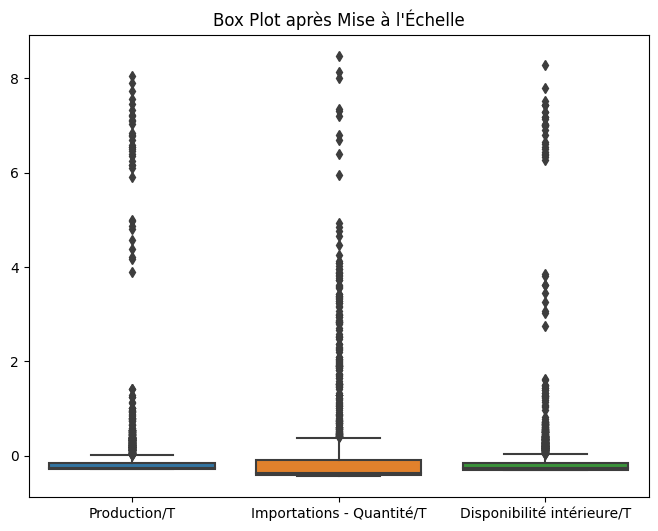

In [48]:
from sklearn.preprocessing import StandardScaler


# Mise à l'échelle des données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_fusion[['Production/T', 'Importations - Quantité/T', 'Disponibilité intérieure/T']])

# Conversion du tableau numpy en DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=['Production/T', 'Importations - Quantité/T', 'Disponibilité intérieure/T'])


# Boîte à moustaches après mise à l'échelle
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_scaled[['Production/T', 'Importations - Quantité/T', 'Disponibilité intérieure/T']])
plt.title('Box Plot après Mise à l\'Échelle')
plt.show()


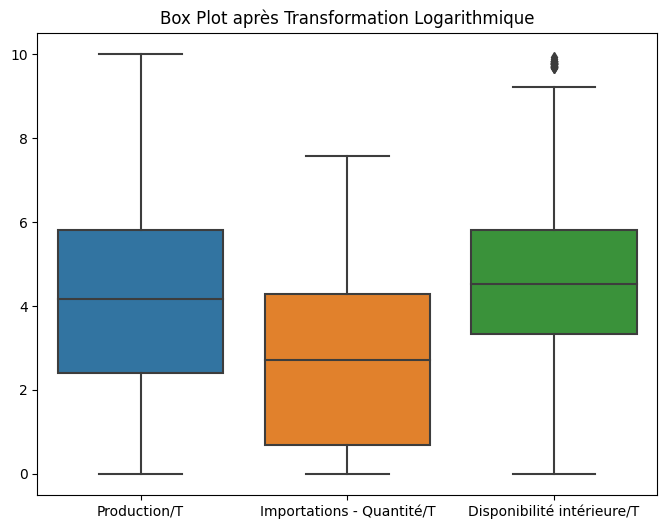

In [49]:
# Transformation logarithmique
df_log = df_fusion[['Production/T', 'Importations - Quantité/T', 'Disponibilité intérieure/T']].applymap(lambda x: 0 if x == 0 else np.log(x))

# Boîte à moustaches après transformation logarithmique
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_log)
plt.title('Box Plot après Transformation Logarithmique')
plt.show()


Incide de Gini : 0.8664292730969119


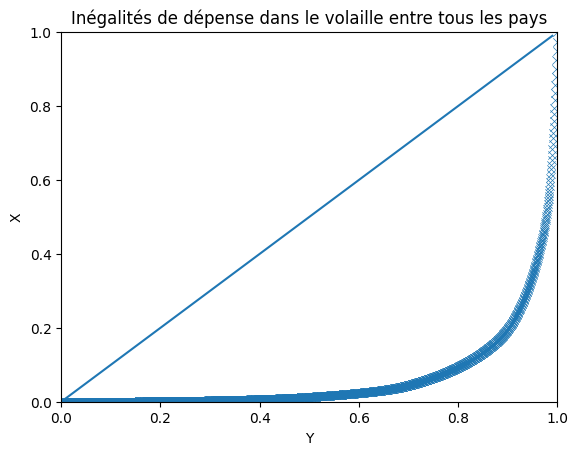

In [50]:
# Courbe de Lorenz
def lorenz(variable, title):
    X = variable.values
    X = np.sort(X)

        # Indice de Gini
    def gini(array):
        array
        sorted_array = array.copy()
        sorted_array.sort()
        n = array.size
        coef_ = 2. / n
        const_ = (n + 1.) / n
        weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_array)])
        return coef_*weighted_sum/(sorted_array.sum()) - const_
    print('Incide de Gini :', gini(X))

    # Courbe de Lorenz
    X_lorenz = X.cumsum() / X.sum()
    X_lorenz = np.insert(X_lorenz, 0, 0)
    # X_lorenz[0], X_lorenz[-1]
    y = np.arange(X_lorenz.size)/(X_lorenz.size-1)
    lorenz = pd.DataFrame()
    lorenz['X'] = pd.Series(X_lorenz)
    lorenz['Y'] = pd.Series(y)
    sns.scatterplot(data=lorenz, x='Y', y='X', marker='x')

    # Diagonale
    a = np.arange(0,1,.01)
    x = a
    y = a
    
    # Graphique
    sns.lineplot(x=x,y=y)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.title(title)
    plt.show()
# Inégalité des chiffres d'affaires annuels de tous les clients
lorenz(df_fusion['Total_USD'], 'Inégalités de dépense dans le volaille entre tous les pays')
#Cet indice varie, 0 représente une situation d'égalité parfaite et 1 indique une inégalité maximale

In [51]:
df_fusion = df_fusion.set_index("Clé_primaire")

df_methode = df_fusion

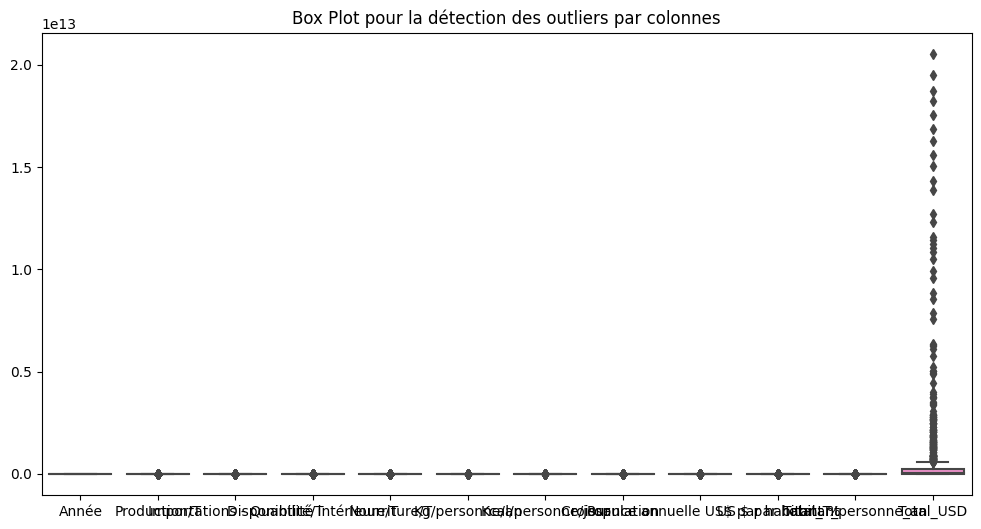


Outliers in Production/T:
                            Production/T
Clé_primaire                            
Brésil_2010                      11185.0
Brésil_2011                      11919.0
Brésil_2012                      12053.0
Brésil_2013                      12492.0
Brésil_2014                      12982.0
Brésil_2015                      13637.0
Brésil_2016                      13778.0
Brésil_2017                      14168.0
Brésil_2018                      14095.0
Chine_2010                       17243.0
Chine_2011                       17800.0
Chine_2012                       18696.0
Chine_2013                       18907.0
Chine_2014                       18188.0
Chine_2015                       17904.0
Chine_2016                       18972.0
Chine_2017                       19090.0
Chine_2018                       20728.0
Chine, continentale_2010         16561.0
Chine, continentale_2011         17088.0
Chine, continentale_2012         18033.0
Chine, continentale_2013      

In [52]:

# Box plot pour visualiser les outliers par colonne
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_methode)
plt.title('Box Plot pour la détection des outliers par colonnes')
plt.show()

selection = df_methode[['Production/T', 'Importations - Quantité/T','Disponibilité intérieure/T', 'Nourriture/T', 'Kg/personne/an', 'Kcal/personne/jour','Population', 'Croissance annuelle US$ par habitant %', 'US $ par habitant', 'Total_T_personne_an', 'Total_USD' ]]
# Calcul du z-score pour chaque colonne
z_scores = stats.zscore(selection)

# Création d'un DataFrame pour stocker les z-scores
z_scores_df = pd.DataFrame(z_scores, columns=selection.columns)

# Détection des outliers en utilisant un seuil z-score (par exemple, seuil de 3)
threshold = 3
outliers = (z_scores_df > threshold) | (z_scores_df < -threshold)

# Affichage des indices des lignes avec des outliers pour chaque colonne
for column in outliers.columns:
    print(f'\nOutliers in {column}:')
    outliers_data = df_methode.loc[outliers[column], [column]]
    print(outliers_data)

In [53]:
somme_par_annee = df_methode.groupby('Année').count()
print(somme_par_annee)

       Zone  Viande de Volailles  Production/T  Importations - Quantité/T  \
Année                                                                       
2010    175                  175           175                        175   
2011    175                  175           175                        175   
2012    176                  176           176                        176   
2013    176                  176           176                        176   
2014    177                  177           177                        177   
2015    177                  177           177                        177   
2016    177                  177           177                        177   
2017    176                  176           176                        176   
2018    177                  177           177                        177   

       Disponibilité intérieure/T  Nourriture/T  Kg/personne/an  \
Année                                                             
2010              

In [54]:
# Création d'un dictionnaire pour stocker les zones par année
zones_par_annee = {annee: set(df_methode[df_methode['Année'] == annee]['Zone']) for annee in df_methode['Année'].unique()}

# Tri des années pour l'analyse séquentielle
annees_triees = sorted(zones_par_annee.keys())

# Comparaison des zones année par année
for i in range(len(annees_triees)-1):
    annee_actuelle = annees_triees[i]
    annee_suivante = annees_triees[i+1]

    zones_actuelles = zones_par_annee[annee_actuelle]
    zones_suivantes = zones_par_annee[annee_suivante]

    # Trouver les zones qui apparaissent ou disparaissent
    zones_nouvelles = zones_suivantes - zones_actuelles
    zones_disparues = zones_actuelles - zones_suivantes

    if zones_nouvelles:
        print(f"Zones nouvelles en {annee_suivante} (par rapport à {annee_actuelle}): {zones_nouvelles}")
    if zones_disparues:
        print(f"Zones disparues en {annee_suivante} (par rapport à {annee_actuelle}): {zones_disparues}")


Zones nouvelles en 2012 (par rapport à 2011): {'Soudan'}
Zones nouvelles en 2014 (par rapport à 2013): {'République populaire démocratique de Corée'}
Zones disparues en 2017 (par rapport à 2016): {'République populaire démocratique de Corée'}
Zones nouvelles en 2018 (par rapport à 2017): {'République populaire démocratique de Corée'}


In [55]:
# suppression des outliers et des Zone nouvelles
outliers_a_supprimer = ["Chine", "Chine, continentale", "États-Unis d'Amérique", "République populaire démocratique de Corée","Soudan"]
df_methode = df_methode[~df_methode['Zone'].isin(outliers_a_supprimer)]


In [56]:
check_for_nan(df_methode)

Le DataFrame ne contient pas de valeurs NaN.


In [57]:
# exporter du data frame pour l'utilisation des méthodes 
df_methode.to_pickle('D:\\CODE\\Projet Openclassrooms\\Projet n_8\\partage.pkl')